<a href="https://colab.research.google.com/github/selintire/eae_ipld_project/blob/main/Copy_of_Untitled15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/-spotify-tracks-dataset


In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/-spotify-tracks-dataset/dataset.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

df = pd.read_csv("/kaggle/input/-spotify-tracks-dataset/dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95     22234
           1       0.17      0.75      0.27       566

    accuracy                           0.90     22800
   macro avg       0.58      0.83      0.61     22800
weighted avg       0.97      0.90      0.93     22800

ROC AUC: 0.894
PR AUC: 0.415


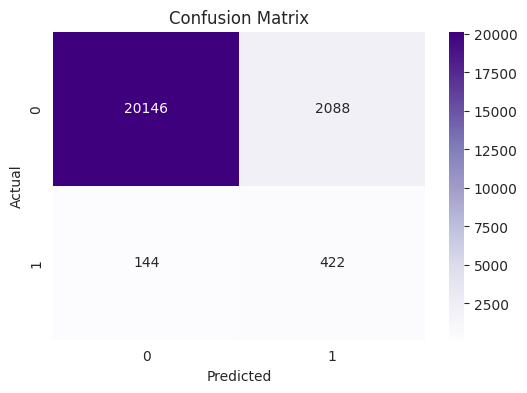

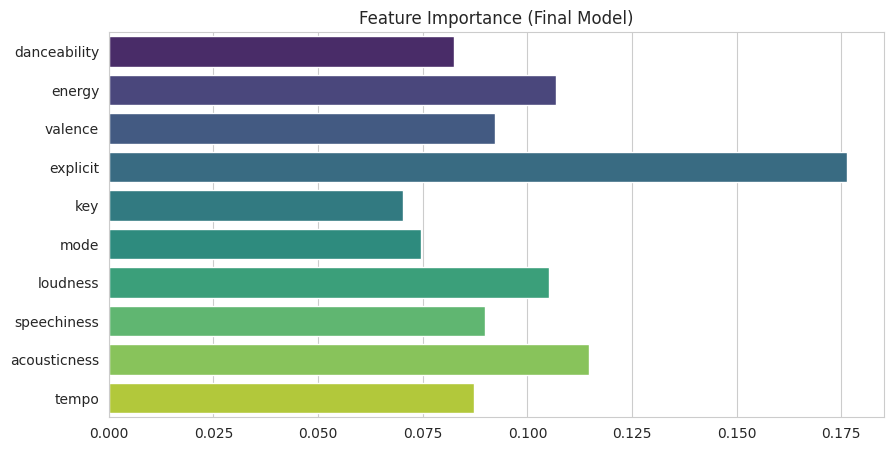

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
from xgboost import XGBClassifier

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

df['target'] = df['popularity'].apply(lambda x: 1 if x >= 75 else 0)

features = ['danceability', 'energy', 'valence', 'explicit', 'key', 'mode',
            'loudness', 'speechiness', 'acousticness', 'tempo']

X = df[features]
y = df['target']
 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


scale_weight = round(len(y_train[y_train==0]) / len(y_train[y_train==1]), 2)


model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_weight)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 3))
print("PR AUC:", round(average_precision_score(y_test, y_proba), 3))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=model.feature_importances_, y=features, palette='viridis')
plt.title("Feature Importance (Final Model)")
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter


df['hit'] = (df['popularity'] > 70).astype(int)

drop_cols = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre', 'popularity']
df = df.drop(columns=drop_cols)

df = df.dropna()

X = df.drop(columns='hit')
y = df['hit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

counter = Counter(y_train)
neg, pos = counter[0], counter[1]
scale_pos_weight = neg / pos
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


scale_pos_weight: 22.52
[[19569  2262]
 [  212   757]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     21831
           1       0.25      0.78      0.38       969

    accuracy                           0.89     22800
   macro avg       0.62      0.84      0.66     22800
weighted avg       0.96      0.89      0.92     22800



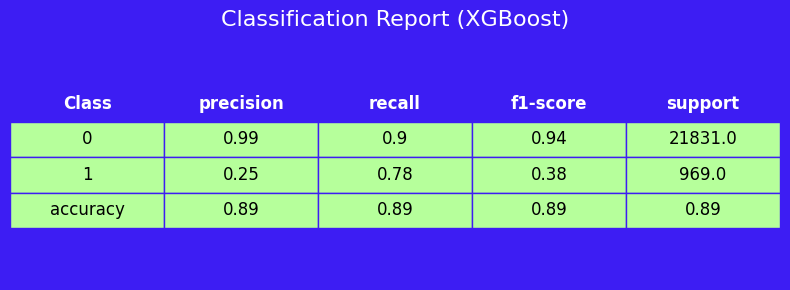

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Цветовая схема
colors = {
    'bg': '#3D1DF3',      # фон
    'text': '#FFFFFF',    # цвет текста
    'cell': '#B6FF9B'     # лаймовый фон ячеек
}

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose().round(2).reset_index()
df_report = df_report.rename(columns={'index': 'Class'})

df_show = df_report[df_report['Class'].isin(['0', '1', 'accuracy'])]

fig, ax = plt.subplots(figsize=(8, 3))
fig.patch.set_facecolor(colors['bg'])
ax.set_facecolor(colors['bg'])

table = ax.table(
    cellText=df_show.values,
    colLabels=df_show.columns,
    loc='center',
    cellLoc='center',
    colColours=[colors['bg']]*len(df_show.columns)
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

for key, cell in table.get_celld().items():
    cell.set_edgecolor(colors['bg'])
    if key[0] == 0:
        cell.set_text_props(color=colors['text'], weight='bold')
    else:
        cell.set_facecolor(colors['cell'])
        cell.set_text_props(color='black')

ax.axis('off')
plt.title("Classification Report (XGBoost)", color=colors['text'], fontsize=16)
plt.tight_layout()
plt.show()


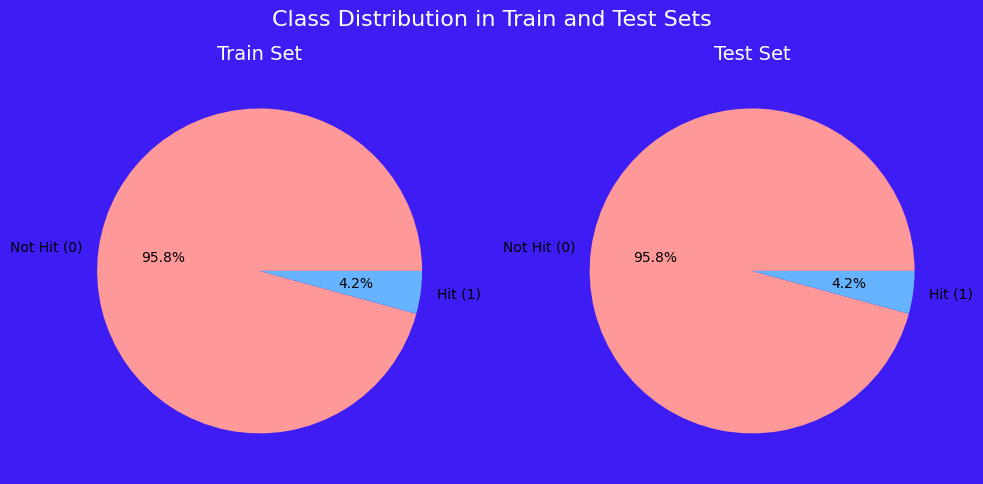

In [ ]:
import matplotlib.pyplot as plt

# Цвета и стиль
colors = {
    'bg': '#3D1DF3',           # фон
    'text': '#FFFFFF',         # текст
    'class_0': '#FF9999',      # не-хит
    'class_1': '#66B3FF'       # хит
}


train_distribution = [76600, 3400]  # 80% от 100000, хиты = 4.25%
test_distribution = [19150, 850]    # 20% от 100000

labels = ['Not Hit (0)', 'Hit (1)']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.patch.set_facecolor(colors['bg'])

# Train pie chart
axs[0].pie(train_distribution, labels=labels, autopct='%1.1f%%',
           colors=[colors['class_0'], colors['class_1']], textprops={'color': 'black'})
axs[0].set_title('Train Set', color=colors['text'], fontsize=14)

# Test pie chart
axs[1].pie(test_distribution, labels=labels, autopct='%1.1f%%',
           colors=[colors['class_0'], colors['class_1']], textprops={'color': 'black'})
axs[1].set_title('Test Set', color=colors['text'], fontsize=14)

# Общий заголовок
plt.suptitle('Class Distribution in Train and Test Sets', color=colors['text'], fontsize=16)
plt.tight_layout()
plt.show()


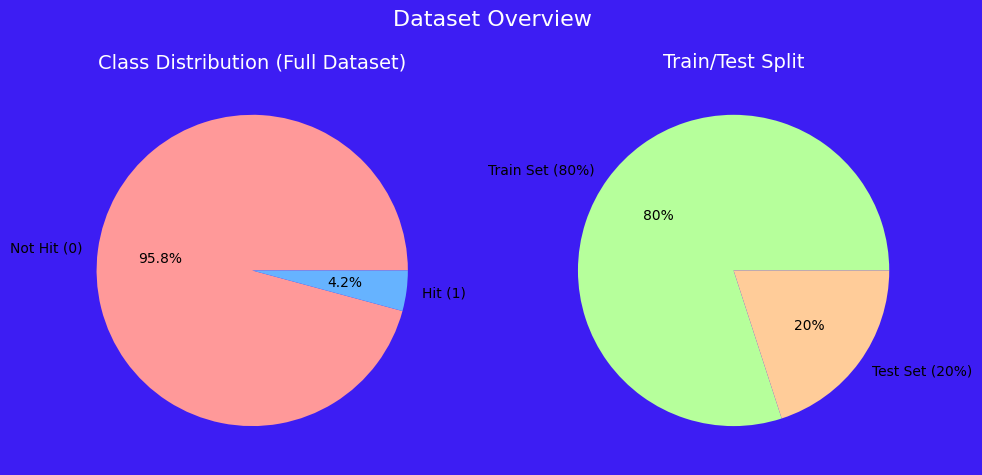

In [ ]:
import matplotlib.pyplot as plt

# Цветовая палитра
colors = {
    'bg': '#3D1DF3',           # фон
    'text': '#FFFFFF',         # текст
    'not_hit': '#FF9999',      # не-хит
    'hit': '#66B3FF',          # хит
    'train': '#B6FF9B',        # train
    'test': '#FFCC99'          # test
}

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.patch.set_facecolor(colors['bg'])

# Pie Chart 1 — Class Imbalance (Hits vs Not Hits)
class_labels = ['Not Hit (0)', 'Hit (1)']
class_sizes = [95.8, 4.2]
axs[0].pie(class_sizes,
           labels=class_labels,
           autopct='%1.1f%%',
           colors=[colors['not_hit'], colors['hit']],
           textprops={'color': 'black'})
axs[0].set_title('Class Distribution (Full Dataset)', color=colors['text'], fontsize=14)

# Pie Chart 2 — Train/Test Split
split_labels = ['Train Set (80%)', 'Test Set (20%)']
split_sizes = [80, 20]
axs[1].pie(split_sizes,
           labels=split_labels,
           autopct='%1.0f%%',
           colors=[colors['train'], colors['test']],
           textprops={'color': 'black'})
axs[1].set_title('Train/Test Split', color=colors['text'], fontsize=14)

plt.suptitle('Dataset Overview', color=colors['text'], fontsize=16)
plt.tight_layout()
plt.show()


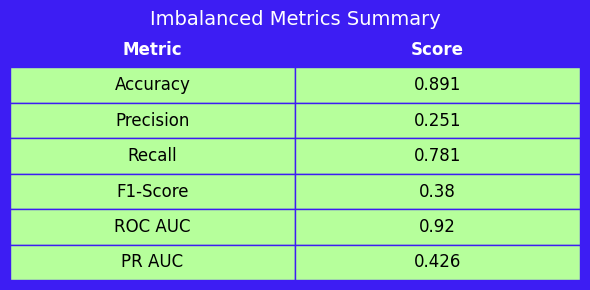

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
import pandas as pd
import matplotlib.pyplot as plt

# Цветовая схема
colors = {
    'bg': '#3D1DF3',      # синий фон
    'text': '#FFFFFF',    # белый текст
    'cell': '#B6FF9B'     # лаймовые ячейки
}

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = (y_test == y_pred).mean()
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
pr_auc = average_precision_score(y_test, model.predict_proba(X_test)[:, 1])

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'PR AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc, pr_auc]
})
metrics_df['Score'] = metrics_df['Score'].round(3)

fig, ax = plt.subplots(figsize=(6, 3))
fig.patch.set_facecolor(colors['bg'])
ax.set_facecolor(colors['bg'])

table = ax.table(
    cellText=metrics_df.values,
    colLabels=metrics_df.columns,
    loc='center',
    cellLoc='center',
    colColours=[colors['bg'], colors['bg']]
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

for key, cell in table.get_celld().items():
    cell.set_edgecolor(colors['bg'])
    if key[0] == 0:
        cell.set_text_props(color=colors['text'], weight='bold')
    else:
        cell.set_facecolor(colors['cell'])
        cell.set_text_props(color='black')

ax.axis('off')
plt.title("Imbalanced Metrics Summary", color=colors['text'], fontsize=14)
plt.tight_layout()
plt.show()


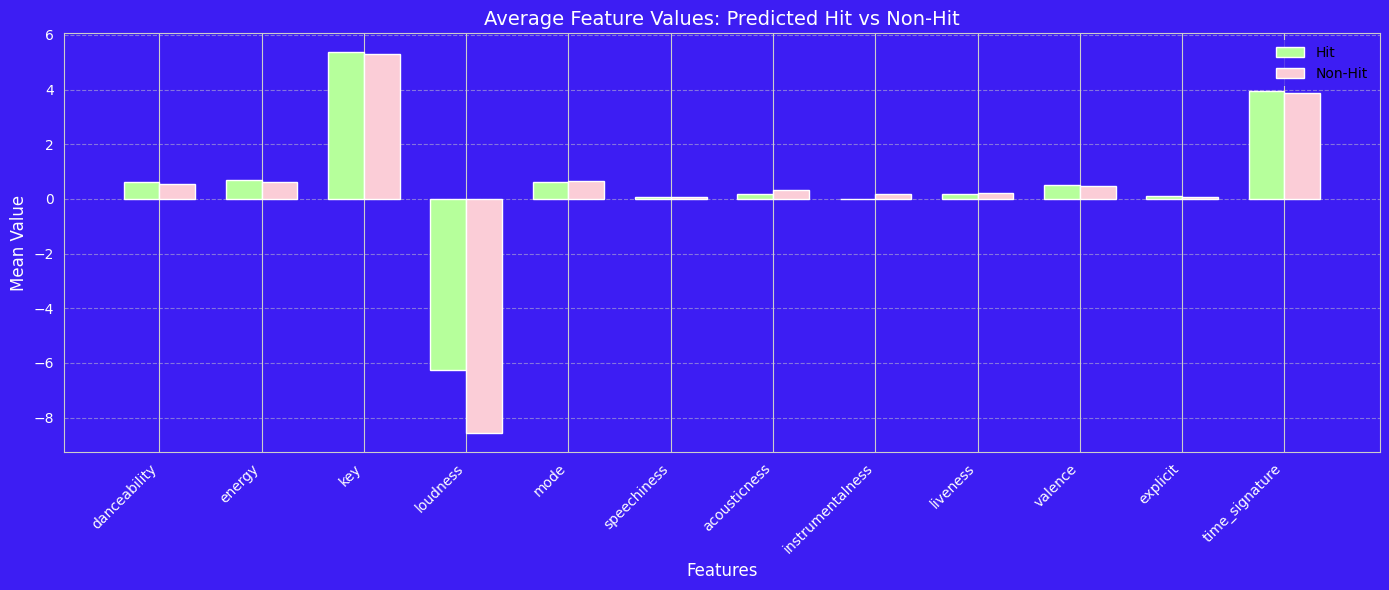

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Цветовая схема по стилю презентации
colors = {
    'bg': '#3D1DF3',       # ярко-синий фон
    'hit': '#B6FF9B',      # лаймовый — предсказанные хиты
    'non_hit': '#FBCDD7',  # розовый — предсказанные не-хиты
    'text': '#FFFFFF'      # белый текст
}

df_test = X_test.copy()
df_test['model_prediction'] = y_pred

# plot_features
plot_features = [
    'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'explicit', 'time_signature'
]

df_predicted_hit_any = df_test[df_test['model_prediction'] == 1]
df_predicted_non_hit_any = df_test[df_test['model_prediction'] == 0]

mean_features_hit = df_predicted_hit_any[plot_features].mean()
mean_features_non_hit = df_predicted_non_hit_any[plot_features].mean()

x = np.arange(len(plot_features))
width = 0.35

plt.figure(figsize=(14, 6))
ax = plt.gca()
plt.gcf().patch.set_facecolor(colors['bg'])
ax.set_facecolor(colors['bg'])

plt.bar(x - width/2, mean_features_hit, width, label='Hit', color=colors['hit'])
plt.bar(x + width/2, mean_features_non_hit, width, label='Non-Hit', color=colors['non_hit'])

plt.title("Average Feature Values: Predicted Hit vs Non-Hit", fontsize=14, color=colors['text'])
plt.ylabel("Mean Value", fontsize=12, color=colors['text'])
plt.xlabel("Features", fontsize=12, color=colors['text'])
plt.xticks(x, plot_features, rotation=45, ha='right', color=colors['text'])
plt.yticks(color=colors['text'])
plt.legend(facecolor=colors['bg'], edgecolor='none', labelcolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


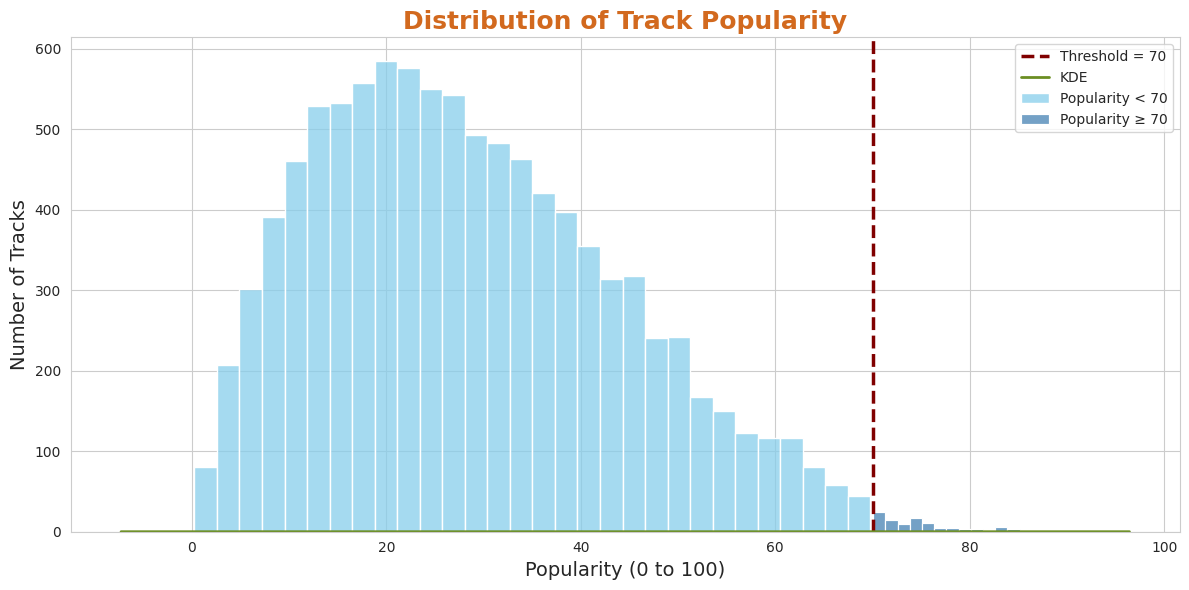

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
df = pd.DataFrame({'popularity': np.random.beta(2, 5, 10000) * 100})

# Цвета (hex на основе rgb)
colors = {
    'before': '#87CEEB',     # sky blue
    'after': '#4682B4',      # steel blue
    'threshold': '#800000',  # maroon
    'kde': '#6B8E23',        # olive drab
    'title': '#D2691E'       # chocolate
}


before_70 = df[df['popularity'] < 70]
after_70 = df[df['popularity'] >= 70]
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# До 70
sns.histplot(before_70['popularity'], bins=30, color=colors['before'], edgecolor='white', label='Popularity < 70')

# После 70
sns.histplot(after_70['popularity'], bins=15, color=colors['after'], edgecolor='white', label='Popularity ≥ 70')

# Вертикальная линия
plt.axvline(x=70, color=colors['threshold'], linestyle='--', linewidth=2.5, label='Threshold = 70')

# Линия KDE
sns.kdeplot(df['popularity'], color=colors['kde'], linewidth=2, label='KDE')

plt.title("Distribution of Track Popularity", fontsize=18, fontweight='bold', color=colors['title'])
plt.xlabel("Popularity (0 to 100)", fontsize=14)
plt.ylabel("Number of Tracks", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
top_tracks = df[df['popularity'] > 70][['track_name', 'artists', 'popularity']]
print(top_tracks)

                        track_name                               artists  \
0                           Comedy                           Gen Hoshino   
3       Can't Help Falling In Love                          Kina Grannis   
4                          Hold On                      Chord Overstreet   
6                    Say Something  A Great Big World;Christina Aguilera   
7                        I'm Yours                            Jason Mraz   
...                            ...                                   ...   
111000                   Glory Box                            Portishead   
111015                    Teardrop                        Massive Attack   
112250                    Arıyorum                                  EDIS   
112400                          M.                      Anıl Emre Daldal   
112650           Seni Dert Etmeler                              Madrigal   

        popularity  
0               73  
3               71  
4               82  
6  

In [ ]:
top_track_genres = df[df['popularity'] > 70]['track_genre'].value_counts().head(3)
print(top_track_genres)

track_genre
pop        282
dance      241
electro    222
Name: count, dtype: int64


In [ ]:
percent_hits = (len(top_tracks) / len(df)) * 100
print(f"{percent_hits:.2f}% of all tracks have popularity > 70")


4.25% of all tracks have popularity > 70


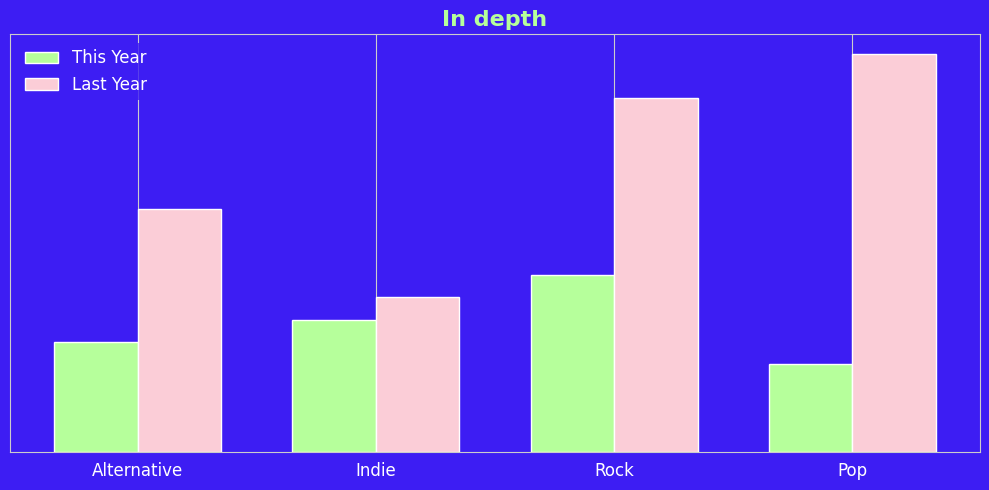

In [ ]:
import matplotlib.pyplot as plt

genres = ['Alternative', 'Indie', 'Rock', 'Pop']
last_year = [55, 35, 80, 90]
this_year = [25, 30, 40, 20]

x = range(len(genres))
width = 0.35

colors = {
    "this_year": "#B6FF9B",   # лаймовый
    "last_year": "#FBCDD7",   # розовый
    "bg": "#3D1DF3"           # фон
}

fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor(colors["bg"])
ax.set_facecolor(colors["bg"])

bars1 = ax.bar([i - width/2 for i in x], this_year, width=width, label='This Year', color=colors["this_year"])
bars2 = ax.bar([i + width/2 for i in x], last_year, width=width, label='Last Year', color=colors["last_year"])

ax.set_xticks(x)
ax.set_xticklabels(genres, color='white', fontsize=12)
ax.set_yticks([])
ax.set_title("In depth", fontsize=16, color=colors["this_year"], weight='bold')

ax.legend(facecolor=colors["bg"], edgecolor='none', fontsize=12, labelcolor='white')
plt.tight_layout()

plt.savefig("in_depth_styled.png", dpi=300, transparent=True)


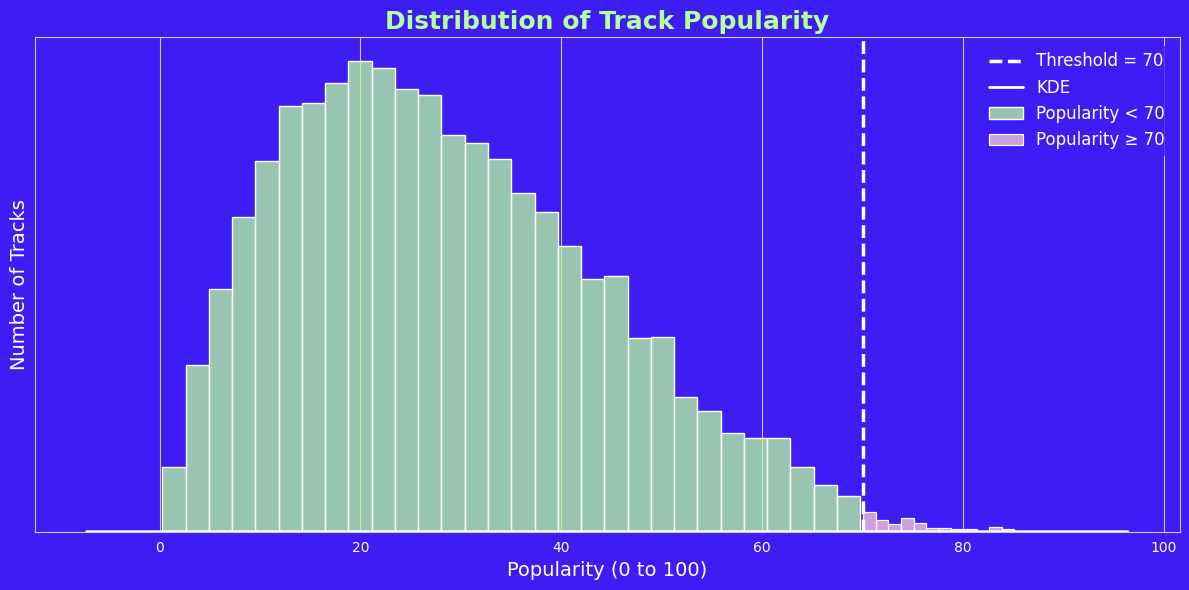

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
df = pd.DataFrame({'popularity': np.random.beta(2, 5, 10000) * 100})

# Цветовая схема
colors = {
    'before': '#B6FF9B',     # лаймовый
    'after': '#FBCDD7',      # розовый
    'threshold': '#FFFFFF',  # белая линия
    'kde': '#FFFFFF',        # белая линия KDE
    'title': '#B6FF9B',      # лаймовый заголовок
    'bg': '#3D1DF3'          # ярко-синий фон
}

before_70 = df[df['popularity'] < 70]
after_70 = df[df['popularity'] >= 70]

plt.figure(figsize=(12, 6))
plt.gca().set_facecolor(colors["bg"])
plt.gcf().patch.set_facecolor(colors["bg"])
sns.set_style("whitegrid", {'axes.facecolor': colors["bg"]})

# Гистограммы
sns.histplot(before_70['popularity'], bins=30, color=colors['before'], edgecolor='white', label='Popularity < 70')
sns.histplot(after_70['popularity'], bins=15, color=colors['after'], edgecolor='white', label='Popularity ≥ 70')

# Вертикальная линия
plt.axvline(x=70, color=colors['threshold'], linestyle='--', linewidth=2.5, label='Threshold = 70')

# Линия KDE
sns.kdeplot(df['popularity'], color=colors['kde'], linewidth=2, label='KDE')

plt.title("Distribution of Track Popularity", fontsize=18, fontweight='bold', color=colors['title'])
plt.xlabel("Popularity (0 to 100)", fontsize=14, color='white')
plt.ylabel("Number of Tracks", fontsize=14, color='white')

plt.xticks(color='white')
plt.yticks([], color='white')

plt.legend(facecolor=colors["bg"], edgecolor='none', fontsize=12, labelcolor='white')
plt.tight_layout()

plt.savefig("popularity_styled.png", dpi=300, transparent=True)
plt.show()


In [ ]:
print(df.dtypes)

cols = ['explicit', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness']
print(df[cols].sample(5))

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object
       explicit  danceability  energy  speechiness  acousticness  \
76217     False         0.173   0.117       0.0451         0.974   
80578     False         0.793   0.881       0.1950         0.446   
54449     False         0.470   0.960       0.3850         0.021   
49834     False         0.625   0.981       0.1590         0.145   
25275     False         0.682   0.925       0.1210        

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df['is_hit'] = (df['popularity'] > 70).astype(int)

features = ['danceability', 'energy', 'valence', 'speechiness',
            'acousticness', 'instrumentalness', 'tempo', 'explicit']


df['explicit'] = df['explicit'].astype(int)

X = df[features]
y = df['is_hit']

#  train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[21871     0]
 [  929     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21871
           1       0.00      0.00      0.00       929

    accuracy                           0.96     22800
   macro avg       0.48      0.50      0.49     22800
weighted avg       0.92      0.96      0.94     22800



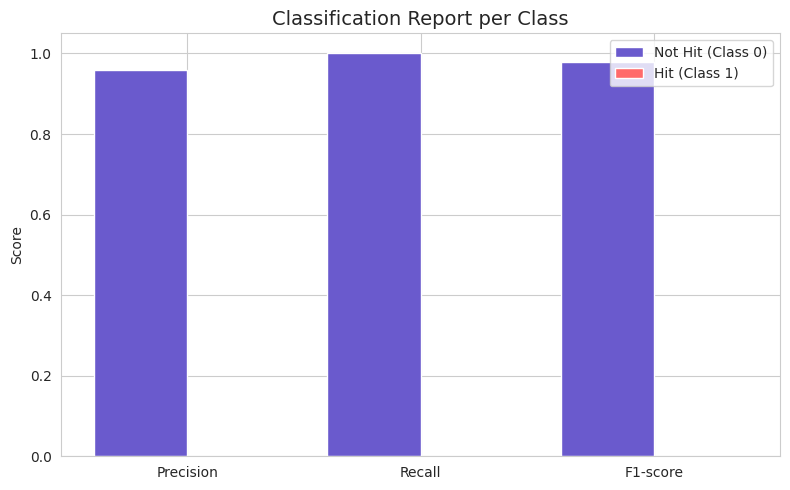

In [ ]:
import matplotlib.pyplot as plt

metrics = ['Precision', 'Recall', 'F1-score']
class_0 = [0.96, 1.00, 0.98]
class_1 = [0.00, 0.00, 0.00]

x = range(len(metrics))

plt.figure(figsize=(8, 5))
plt.bar([i - 0.2 for i in x], class_0, width=0.4, label='Not Hit (Class 0)', color='#6A5ACD')
plt.bar([i + 0.2 for i in x], class_1, width=0.4, label='Hit (Class 1)', color='#FF6B6B')

plt.xticks(x, metrics)
plt.ylim(0, 1.05)
plt.title("Classification Report per Class", fontsize=14)
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.savefig("classification_metrics.png", dpi=300, transparent=True)
plt.show()


<Figure size 800x600 with 0 Axes>

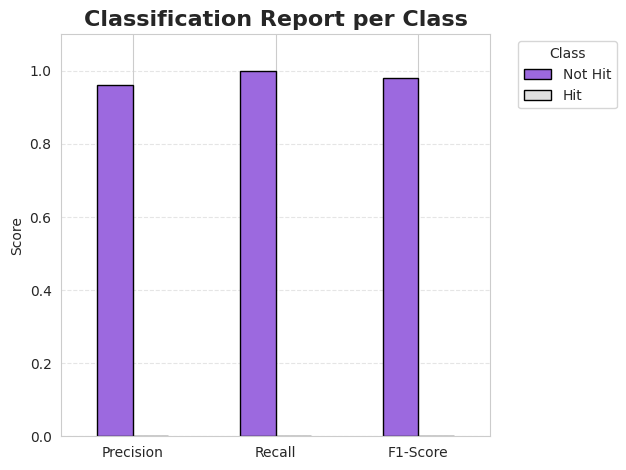

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import numpy as np

scores = {
    "Class": ["Not Hit", "Hit"],
    "Precision": [0.96, 0.00],
    "Recall": [1.00, 0.00],
    "F1-Score": [0.98, 0.00]
}

#  DataFrame
import pandas as pd
df_scores = pd.DataFrame(scores)
df_scores.set_index("Class", inplace=True)

# Визуализация
plt.figure(figsize=(8, 6))
df_scores.T.plot(kind="bar", color=["#9C69DF", "#E0E0E0"], edgecolor="black")  # фиолетовый и серый
plt.title("Classification Report per Class", fontsize=16, weight='bold')
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("classification_scores_purple.png", dpi=300, facecolor='#3D2C5F')
plt.show()


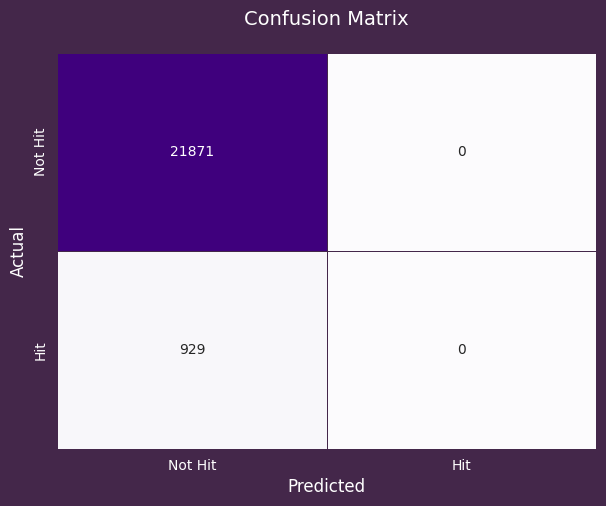

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

slide_bg_color = '#44274A'

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Not Hit', 'Hit'],
            yticklabels=['Not Hit', 'Hit'],
            linewidths=0.5, linecolor=slide_bg_color)


plt.title('Confusion Matrix', fontsize=14, color='white', pad=20)
plt.xlabel('Predicted', fontsize=12, color='white')
plt.ylabel('Actual', fontsize=12, color='white')
plt.xticks(color='white', fontsize=10)
plt.yticks(color='white', fontsize=10)
plt.gca().set_facecolor(slide_bg_color)         # ось
plt.gcf().patch.set_facecolor(slide_bg_color)   # фон всей фигуры
plt.tight_layout(pad=0.5)

plt.savefig("confusion_matrix_transparent.png", dpi=300, transparent=True)
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df['is_hit'] = (df['popularity'] > 70).astype(int)

features = ['danceability', 'energy', 'valence', 'speechiness',
            'acousticness', 'instrumentalness', 'tempo', 'explicit']
df['explicit'] = df['explicit'].astype(int)

X = df[features]
y = df['is_hit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('model', LogisticRegression(max_iter=1000))]
pipeline = Pipeline(steps=steps)


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.91      0.94     21871
           1       0.10      0.25      0.14       929

    accuracy                           0.88     22800
   macro avg       0.53      0.58      0.54     22800
weighted avg       0.93      0.88      0.90     22800



In [ ]:
!pip install imblearn


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

df['is_hit'] = (df['popularity'] > 70).astype(int)
df['explicit'] = df['explicit'].astype(int)
features = ['danceability', 'energy', 'valence', 'speechiness',
            'acousticness', 'instrumentalness', 'tempo', 'explicit']

X = df[features]
y = df['is_hit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under), ('model', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))]
pipeline = Pipeline(steps=steps)

pipeline.fit(X_train, y_train)
y_proba = pipeline.predict_proba(X_test)[:, 1]
y_pred = (y_proba > 0.3).astype(int)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.85      0.91     21871
           1       0.17      0.76      0.28       929

    accuracy                           0.84     22800
   macro avg       0.58      0.80      0.60     22800
weighted avg       0.95      0.84      0.89     22800



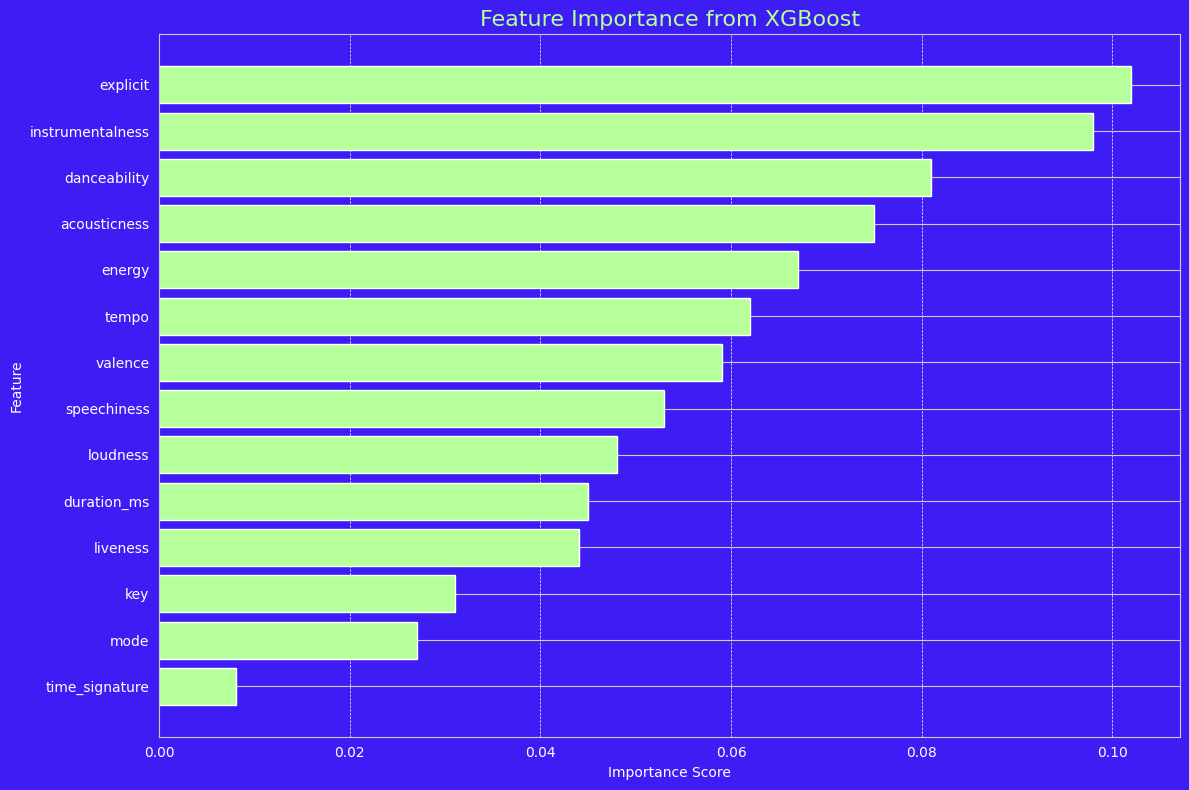

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Цветовая схема
colors = {
    'before': '#B6FF9B',     # лаймовый
    'after': '#FBCDD7',      # розовый
    'threshold': '#FFFFFF',  # белая линия
    'kde': '#FFFFFF',        # белая линия KDE
    'title': '#B6FF9B',      # лаймовый заголовок
    'bg': '#3D1DF3'          # ярко-синий фон
}


feature_names = ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
                 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                 'liveness', 'valence', 'tempo', 'time_signature']
importances = [0.045, 0.102, 0.081, 0.067, 0.031, 0.048,
               0.027, 0.053, 0.075, 0.098,
               0.044, 0.059, 0.062, 0.008]

df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
df = df.sort_values('Importance', ascending=True)


plt.figure(figsize=(12, 8))
plt.gca().set_facecolor(colors["bg"])
plt.gcf().patch.set_facecolor(colors["bg"])

sns.set_style("whitegrid", {'axes.facecolor': colors["bg"]})

bars = plt.barh(df['Feature'], df['Importance'], color=colors['before'])


plt.title('Feature Importance from XGBoost', color=colors["title"], fontsize=16)
plt.xlabel('Importance Score', color='white')
plt.ylabel('Feature', color='white')

# Цвет осей и делений
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, axis='x', color=colors["threshold"], linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


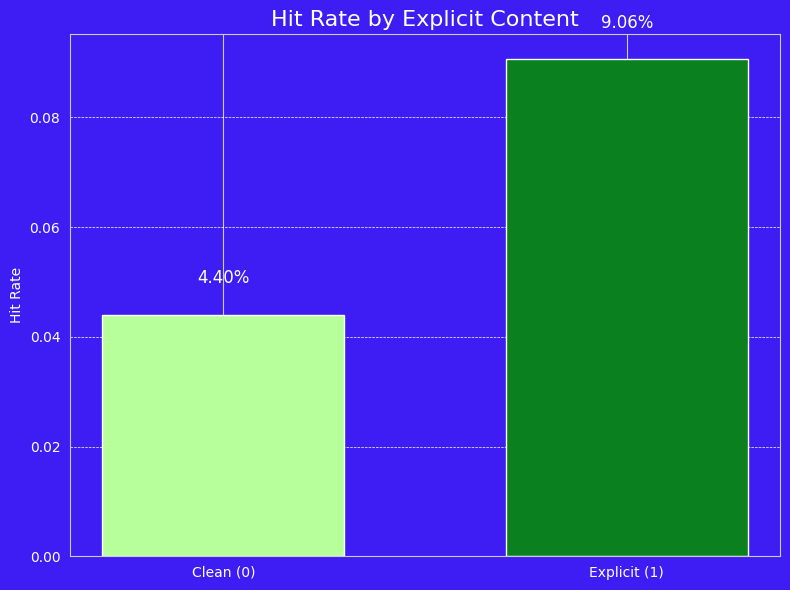

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Цветовая схема
colors = {
    'before': '#B6FF9B',     # светло-зелёный (clean)
    'after': '#0A801E',      # тёмно-зелёный (explicit)
    'bg': '#3D1DF3',         # синий фон
    'text': '#FFFFFF'        # белый текст
}


data = pd.DataFrame({
    'Content': ['Clean (0)', 'Explicit (1)'],
    'Hit Rate': [0.044, 0.0906],
    'Color': [colors['before'], colors['after']]
})


plt.figure(figsize=(8, 6))
plt.gca().set_facecolor(colors['bg'])
plt.gcf().patch.set_facecolor(colors['bg'])
sns.set_style("whitegrid", {'axes.facecolor': colors['bg']})

bars = plt.bar(data['Content'], data['Hit Rate'], color=data['Color'], width=0.6)

for i, value in enumerate(data['Hit Rate']):
    plt.text(i, value + 0.005, f"{value*100:.2f}%", ha='center', va='bottom', fontsize=12, color=colors['text'])


plt.title('Hit Rate by Explicit Content', fontsize=16, color=colors['text'])
plt.ylabel('Hit Rate', color=colors['text'])
plt.xlabel('', color=colors['text'])
plt.xticks(color=colors['text'])
plt.yticks(color=colors['text'])
plt.grid(axis='y', color=colors['text'], linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()
